### Business Scenario - Question 2

It is very hard to identify complex claims and triage them to the right people. It would be nice if we can detect these complex claims early and get them to the right claims handlers to manage.
They shared a dataset with you with details of some historical claims that can be valuable for your analysis.

In [10]:
import pandas as pd

pd.set_option('display.max_rows', 500)

# Load the dataset
file_path = '../data/data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,...,ClaimDescriptionKeyword_4,ClaimDescriptionKeyword_5,ClaimDescriptionKeyword_6,ClaimDescriptionKeyword_7,ClaimDescriptionKeyword_8,ClaimDescriptionKeyword_9,ClaimDescriptionKeyword_10,ClaimDescriptionKeyword_11,InitialIncurredClaimsCost,UltimateIncurredClaimCost
0,WC8285054,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,...,-0.137039,1.634239,-1.436096,-0.757871,-1.091920,0.880767,0.168497,1.161294,1500,4748.203388
1,WC6982224,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,...,1.788994,0.459482,0.662757,-0.240500,-0.162451,0.665242,0.844019,-1.305332,5500,6326.285819
2,WC5481426,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,...,-0.045712,-0.192742,-0.047881,0.139051,-0.339551,-0.386420,-0.397919,-0.259750,1700,2293.949087
3,WC9775968,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,...,0.067053,1.105471,0.609462,1.495272,-0.527257,-0.187209,-0.857031,-0.343594,15000,17786.487170
4,WC2634037,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,...,-0.647481,-1.413973,-0.807369,0.243139,1.031237,0.366183,0.427945,-0.038234,2800,4014.002925


In [11]:
df.drop(['ClaimNumber'], axis=1,  inplace=True)

#### Handling Missing Data

In [12]:

# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]

# Extract the column names with missing values
missing_column_names = missing_columns.index.tolist()

missing_columns, missing_column_names


(MaritalStatus    29
 dtype: int64,
 ['MaritalStatus'])

In [13]:
# Analyzing the distribution of 'MaritalStatus'
marital_status_distribution = df['MaritalStatus'].value_counts()
marital_status_distribution


MaritalStatus
S    26161
M    22516
U     5294
Name: count, dtype: int64

In [14]:
# Fill missing values in 'MaritalStatus' with 'U' (Unknown)
df['MaritalStatus'].fillna('U', inplace=True)

# Verify if there are any missing values left
missing_values_after_fill = df.isnull().sum()
missing_values_after_fill[missing_values_after_fill > 0]

Series([], dtype: int64)

### Feature Engineering

In [15]:
# Convert datetime columns to datetime format
df['DateTimeOfAccident'] = pd.to_datetime(df['DateTimeOfAccident'], errors='coerce')
df['DateReported'] = pd.to_datetime(df['DateReported'], errors='coerce')

# Calculate the time difference between DateTimeOfAccident and DateReported
df['AccidentToReportDays'] = (df['DateReported'] - df['DateTimeOfAccident']).dt.days

# Extract year, month, and day from the DateTimeOfAccident column
df['AccidentYear'] = df['DateTimeOfAccident'].dt.year
df['AccidentMonth'] = df['DateTimeOfAccident'].dt.month
df['AccidentDay'] = df['DateTimeOfAccident'].dt.day

# Extract year, month, and day from the DateReported column
df['ReportYear'] = df['DateReported'].dt.year
df['ReportMonth'] = df['DateReported'].dt.month
df['ReportDay'] = df['DateReported'].dt.day

# Drop time features
df.drop(['DateTimeOfAccident', 'DateReported'], axis=1, inplace=True)

# Display the first few rows to verify the new features
df.head()


,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescriptionKeyword_0,...,ClaimDescriptionKeyword_11,InitialIncurredClaimsCost,UltimateIncurredClaimCost,AccidentToReportDays,AccidentYear,AccidentMonth,AccidentDay,ReportYear,ReportMonth,ReportDay
0,48,M,M,0,0,500.00,F,38.0,5,2.254325,...,1.161294,1500,4748.203388,86,2002,4,9,2002,7,5
1,43,F,M,0,0,509.34,F,37.5,5,2.356002,...,-1.305332,5500,6326.285819,12,1999,1,7,1999,1,20
2,30,M,U,0,0,709.10,F,38.0,5,0.817685,...,-0.259750,1700,2293.949087,20,1996,3,25,1996,4,14
3,41,M,S,0,0,555.46,F,38.0,5,4.022864,...,-0.343594,15000,17786.487170,29,2005,6,22,2005,7,22
4,36,M,M,0,0,377.10,F,38.0,5,3.383056,...,-0.038234,2800,4014.002925,28,1990,8,29,1990,9,27


#### Total Dependents

In [16]:
# Create Total Dependents feature
df['TotalDependents'] = df['DependentChildren'] + df['DependentsOther']

df.drop(['DependentChildren','DependentsOther'], axis=1, inplace=True)

#### Complex Claim Engineering

**Definition of Complex Claim**

1. High Ultimate incurred claim cost.

2. Low initial incurred claim cost but high ultimate incurred claim cost.

3. Claimant age more than 45 with dependent children or other dependents.

4. Low weekly wages but high Ultimate claim cost.

5. Low hours and days worked per week but high Ultimate claim cost.

6. High days between accident and report and high Ultimate claim cost.

**Assign Weights to Each Criterion:**

We'll normalize each criterion to a scale of 0 to 1 and then assign weights to each criterion.

**Calculate Composite Score:**

Sum the weighted scores to create a composite score for each claim.

**Define Threshold for Binary Classification:**

Claims with a composite score above the threshold will be labeled as complex claims.


In [17]:
df.iloc[0]

Age                                    48
Gender                                  M
MaritalStatus                           M
WeeklyWages                         500.0
PartTimeFullTime                        F
HoursWorkedPerWeek                   38.0
DaysWorkedPerWeek                       5
ClaimDescriptionKeyword_0        2.254325
ClaimDescriptionKeyword_1       -1.466085
ClaimDescriptionKeyword_2       -1.278155
ClaimDescriptionKeyword_3       -0.422165
ClaimDescriptionKeyword_4       -0.137039
ClaimDescriptionKeyword_5        1.634239
ClaimDescriptionKeyword_6       -1.436096
ClaimDescriptionKeyword_7       -0.757871
ClaimDescriptionKeyword_8        -1.09192
ClaimDescriptionKeyword_9        0.880767
ClaimDescriptionKeyword_10       0.168497
ClaimDescriptionKeyword_11       1.161294
InitialIncurredClaimsCost            1500
UltimateIncurredClaimCost     4748.203388
AccidentToReportDays                   86
AccidentYear                         2002
AccidentMonth                     

In [18]:
# Define thresholds and calculate scores for each criterion
high_ultimate_threshold = df['UltimateIncurredClaimCost'].quantile(0.50)

low_initial_high_ultimate = ((df['InitialIncurredClaimsCost'] < df['InitialIncurredClaimsCost'].quantile(0.50)) &
                             (df['UltimateIncurredClaimCost'] > high_ultimate_threshold))

age_with_dependents = ((df['Age'] > 45) & (df['TotalDependents'] > 0))

low_wages_high_claims = ((df['WeeklyWages'] < df['WeeklyWages'].quantile(0.20)) &
                         (df['UltimateIncurredClaimCost'] > high_ultimate_threshold))

low_hours_days_high_claims = ((df['HoursWorkedPerWeek'] < df['HoursWorkedPerWeek'].quantile(0.20)) |
                              (df['DaysWorkedPerWeek'] < df['DaysWorkedPerWeek'].quantile(0.20)) &
                              (df['UltimateIncurredClaimCost'] > high_ultimate_threshold))

high_days_report_high_claim = ((df['AccidentToReportDays'] > df['AccidentToReportDays'].quantile(0.50)) &
                               (df['UltimateIncurredClaimCost'] > high_ultimate_threshold))

# Create scores for each criterion
df['Score_HighUltimate'] = (df['UltimateIncurredClaimCost'] > high_ultimate_threshold).astype(int)
df['Score_LowInitialHighUltimate'] = low_initial_high_ultimate.astype(int)
df['Score_AgeWithDependents'] = age_with_dependents.astype(int)
df['Score_LowWagesHighClaims'] = low_wages_high_claims.astype(int)
df['Score_LowHoursDaysHighClaims'] = low_hours_days_high_claims.astype(int)
df['Score_HighDaysReportHighClaim'] = high_days_report_high_claim.astype(int)



In [19]:

# Define weights for each criterion
weights = {
    'Score_HighUltimate': 0.3,
    'Score_LowInitialHighUltimate': 0.2,
    'Score_AgeWithDependents': 0.15,
    'Score_LowWagesHighClaims': 0.15,
    'Score_LowHoursDaysHighClaims': 0.1,
    'Score_HighDaysReportHighClaim': 0.1
}

# Calculate composite score
df['CompositeScore'] = (df['Score_HighUltimate'] * weights['Score_HighUltimate'] +
                          df['Score_LowInitialHighUltimate'] * weights['Score_LowInitialHighUltimate'] +
                          df['Score_AgeWithDependents'] * weights['Score_AgeWithDependents'] +
                          df['Score_LowWagesHighClaims'] * weights['Score_LowWagesHighClaims'] +
                          df['Score_LowHoursDaysHighClaims'] * weights['Score_LowHoursDaysHighClaims'] +
                          df['Score_HighDaysReportHighClaim'] * weights['Score_HighDaysReportHighClaim'])


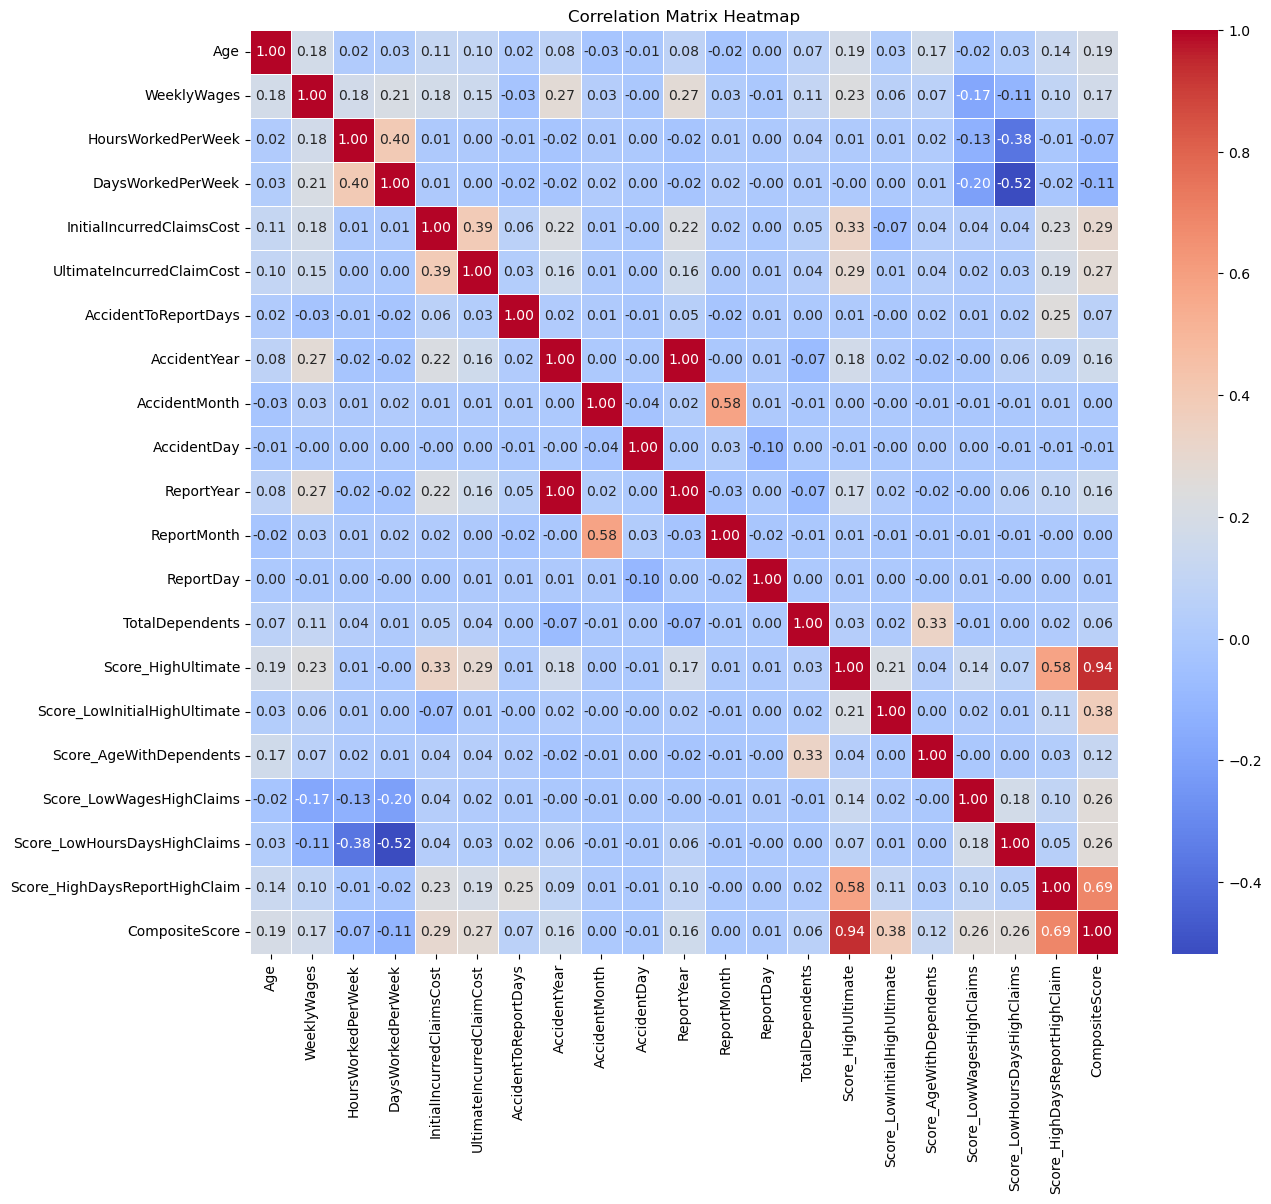

In [21]:
# Correlation Analysis: Correlation matrix and heatmap
import matplotlib.pyplot as plt
import seaborn as sns
# Compute correlation matrix
correlation_matrix = df[['Age', 'WeeklyWages', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'InitialIncurredClaimsCost', 'UltimateIncurredClaimCost',
       'AccidentToReportDays', 'AccidentYear', 'AccidentMonth', 'AccidentDay',
       'ReportYear', 'ReportMonth', 'ReportDay', 'TotalDependents',
       'Score_HighUltimate', 'Score_LowInitialHighUltimate',
       'Score_AgeWithDependents', 'Score_LowWagesHighClaims',
       'Score_LowHoursDaysHighClaims', 'Score_HighDaysReportHighClaim',
       'CompositeScore']].corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Dropping all the score columns as they are a derivation of the target CompositeClaim

In [22]:
# Drop columns that start with 'Score_'
df = df.loc[:, ~df.columns.str.startswith('Score_')]

In [23]:
# Define threshold for complex claims
threshold = 0.4

# Create binary label based on the composite score
df['ComplexClaim'] = df['CompositeScore'] > threshold
df['ComplexClaim'] = df['ComplexClaim'].map({True: 'Yes', False: 'No'})

# Dropping Composite Score
df.drop('CompositeScore', axis=1, inplace=True)

df['ComplexClaim'].value_counts()

/var/folders/2l/l77dj89n1m3dkdt8_2sc8_9w0000gp/T/ipykernel_14403/2176622182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ComplexClaim'] = df['CompositeScore'] > threshold
/var/folders/2l/l77dj89n1m3dkdt8_2sc8_9w0000gp/T/ipykernel_14403/2176622182.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ComplexClaim'] = df['ComplexClaim'].map({True: 'Yes', False: 'No'})
/var/folders/2l/l77dj89n1m3dkdt8_2sc8_9w0000gp/T/ipykernel_14403/2176622182.py:9: SettingWithCopyWarning: 
A value is trying to be

ComplexClaim
No     48635
Yes     5365
Name: count, dtype: int64

#### One hot encoding features

In [24]:
# One-hot encoding for categorical variables
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Gender', 'MaritalStatus', 'PartTimeFullTime']
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[categorical_features])

# Convert encoded features to DataFrame
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate encoded features with the main dataset
df = pd.concat([df, encoded_features_df], axis=1)

# Drop original categorical columns
df.drop(columns=categorical_features, inplace=True)

/Users/mahatisuvvari/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Scaling continuous features

In [25]:
from sklearn.preprocessing import StandardScaler

# Extract continuous features
continuous_features = ['TotalDependents', 'HoursWorkedPerWeek',
       'DaysWorkedPerWeek','ClaimDescriptionKeyword_0',
       'ClaimDescriptionKeyword_1', 'ClaimDescriptionKeyword_2',
       'ClaimDescriptionKeyword_3', 'ClaimDescriptionKeyword_4',
       'ClaimDescriptionKeyword_5', 'ClaimDescriptionKeyword_6',
       'ClaimDescriptionKeyword_7', 'ClaimDescriptionKeyword_8',
       'ClaimDescriptionKeyword_9', 'ClaimDescriptionKeyword_10',
       'ClaimDescriptionKeyword_11', 'AccidentToReportDays', 'AccidentYear', 
       'AccidentMonth', 'AccidentDay', 'ReportYear', 'ReportMonth', 
       'ReportDay','Age', 'WeeklyWages', 'InitialIncurredClaimsCost']

# Scaling continuous features
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

# Display the scaled continuous features
scaled_df = df.copy()
scaled_df.head()


,Age,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescriptionKeyword_0,ClaimDescriptionKeyword_1,ClaimDescriptionKeyword_2,ClaimDescriptionKeyword_3,ClaimDescriptionKeyword_4,ClaimDescriptionKeyword_5,...,TotalDependents,ComplexClaim,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,1.167923,0.336376,0.021078,0.170688,-0.089609,-0.616907,-0.846976,-0.333072,-0.123619,1.637256,...,-0.234827,Yes,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.755452,0.373940,-0.018704,0.170688,0.003210,-0.497952,0.971046,-0.686364,1.710635,0.393825,...,-0.234827,No,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.316974,1.177363,0.021078,0.170688,-1.401107,-0.398841,0.990700,-0.164466,-0.036644,-0.296526,...,-0.234827,No,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.590464,0.559432,0.021078,0.170688,1.524875,2.066026,-0.017245,1.130292,0.070748,1.077577,...,-0.234827,No,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.177992,-0.157921,0.021078,0.170688,0.940800,0.234675,1.103339,-1.196205,-0.609736,-1.589146,...,-0.234827,No,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


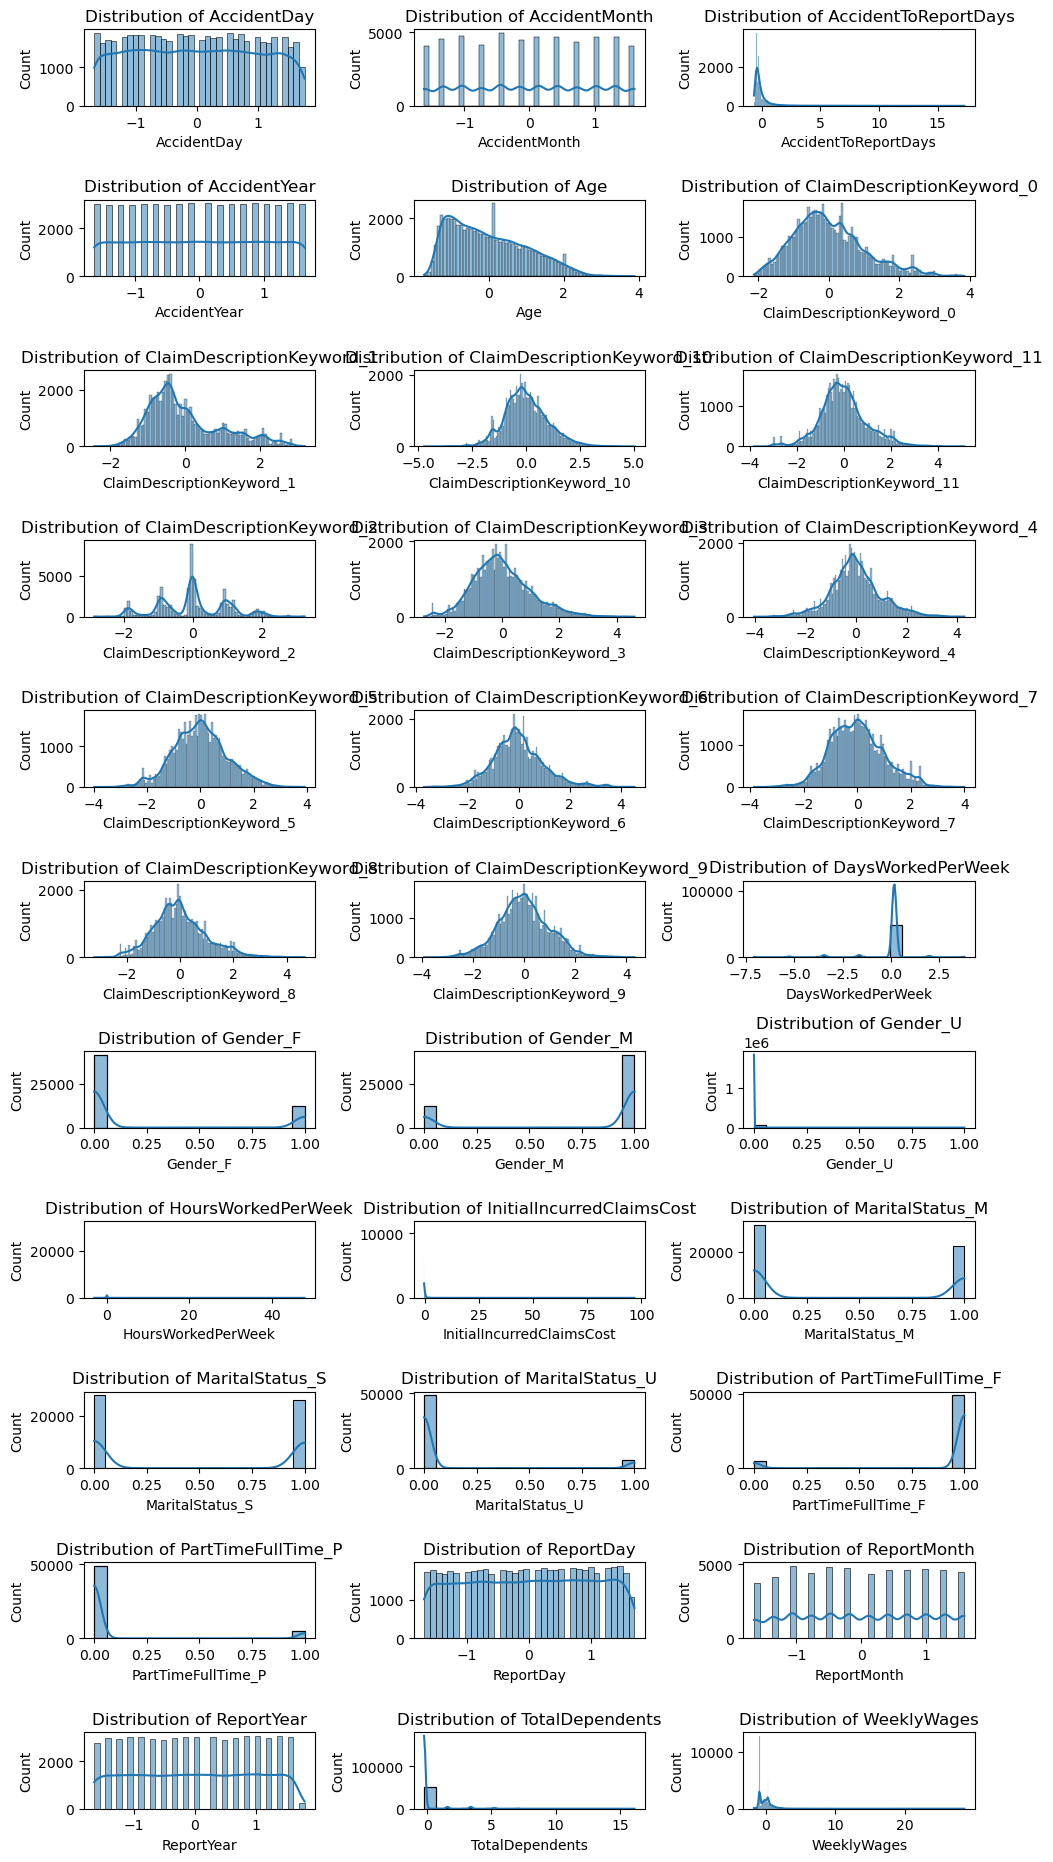

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify all continuous variables apart from the target variable
continuous_variables = df.select_dtypes(include=['float64', 'int64']).columns.difference(['UltimateIncurredClaimCost'])

# Adjust the plotting to handle all continuous variables correctly
plt.figure(figsize=(10, 20))

# Adjusting the number of rows and columns in the subplot
num_plots = len(continuous_variables)
rows = (num_plots // 3) + 1

for i, feature in enumerate(continuous_variables, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

/Users/mahatisuvvari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


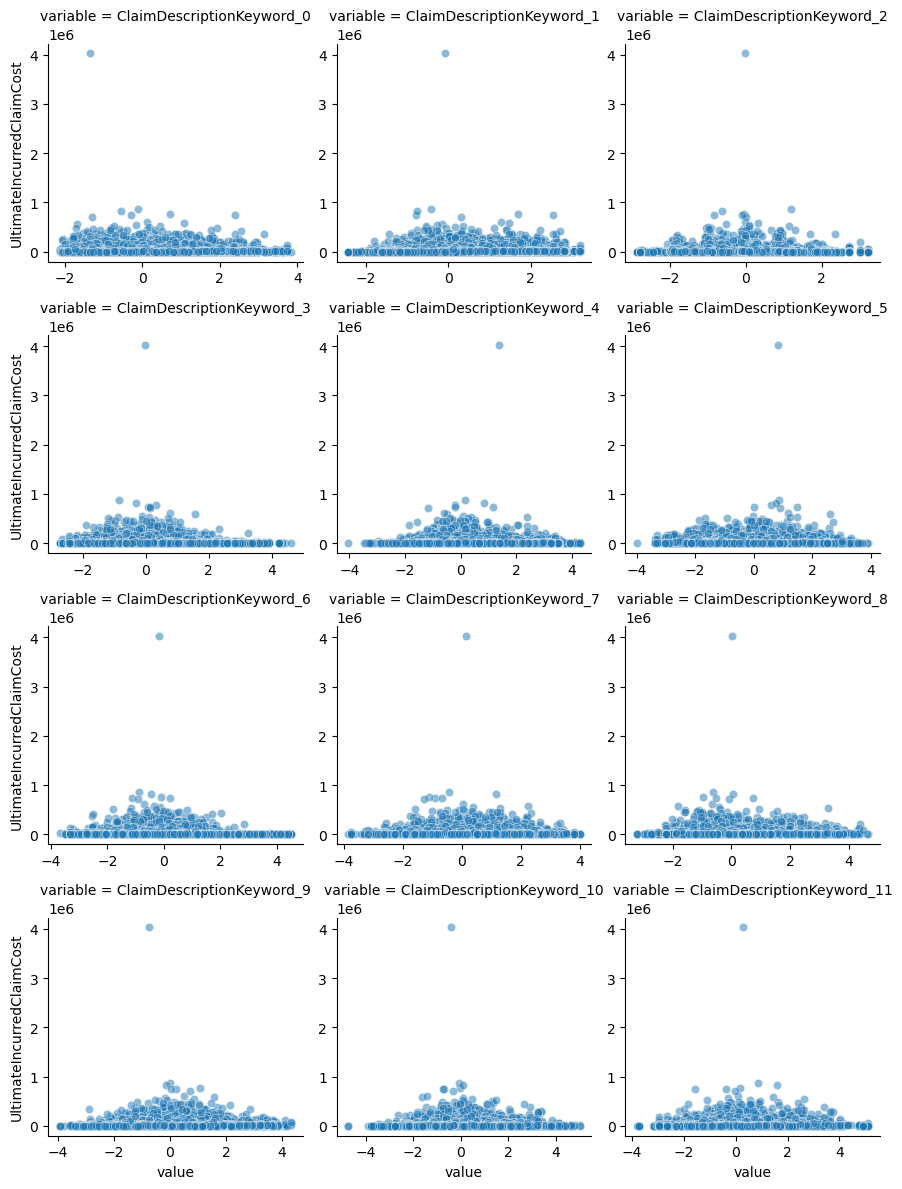

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select `ClaimDescriptionKeyword` features
claim_description_keywords = df.filter(like='ClaimDescriptionKeyword')

# Create a DataFrame with the target variable and the `ClaimDescriptionKeyword` features
plot_df = pd.concat([claim_description_keywords, df['UltimateIncurredClaimCost']], axis=1)

# Create the FacetGrid
g = sns.FacetGrid(plot_df.melt(id_vars='UltimateIncurredClaimCost'), col='variable', col_wrap=3, sharex=False, sharey=False, height=3)
g.map(sns.scatterplot, 'value', 'UltimateIncurredClaimCost', alpha=0.5)

plt.show()


#### Outlier detection and removing highly correlated features

In [28]:
import numpy as np

# Outlier treatment function
def treat_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply the outlier treatment to all numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.difference(['UltimateIncurredClaimCost'])

print("Before removing outliers: {}".format(df.shape))
df = treat_outliers(df, numerical_columns)
print("After removing outliers: {}".format(df.shape))


Before removing outliers: (54000, 35)
After removing outliers: (54000, 35)


In [29]:
import numpy as np

# Calculate the correlation matrix
correlation_matrix = df[['Age', 'WeeklyWages', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'InitialIncurredClaimsCost', 'UltimateIncurredClaimCost',
       'AccidentToReportDays', 'AccidentYear', 'AccidentMonth', 'AccidentDay',
       'ReportYear', 'ReportMonth', 'ReportDay', 'TotalDependents']].corr().abs()

# Create a mask to ignore the upper triangle of the correlation matrix
upper_triangle_mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
upper_triangle = correlation_matrix.where(upper_triangle_mask)

# Identify features with correlation greater than 0.8
correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

# Drop the highly correlated features
df_reduced = df.drop(columns=correlated_features)

correlated_features


['ReportYear']

In [30]:
df_reduced.ComplexClaim.value_counts()

ComplexClaim
No     48635
Yes     5365
Name: count, dtype: int64

In [31]:
#### Remove 'UltimateIncurredClaimCost'
df_reduced.drop('UltimateIncurredClaimCost', axis=1, inplace=True)

#### Label Encoding

In [32]:
# !pip uninstall scikit-learn --yes
# !pip uninstall imblearn --yes
# !pip install scikit-learn==1.2.2
# !pip install imblearn

In [33]:
from sklearn.model_selection import train_test_split

target = 'ComplexClaim'

# Separate features and target variable
X = df_reduced.drop(columns=target)
y = df_reduced[target]

In [34]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#### Splitting in train test.

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

#### As we have a minority class, we will try oversampling the data using SMOTE

In [36]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#Display the class distribution before applying SMOTE
print(f"Class distribution before SMOTE: {Counter(y_train)}")

# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Display the class distribution after applying SMOTE
print(f"Class distribution after SMOTE: {Counter(y_train)}")


Class distribution before SMOTE: Counter({0: 34020, 1: 3780})
Class distribution after SMOTE: Counter({0: 34020, 1: 34020})


#### Baseline Model

In [37]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, le):
    
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Test Accuracy
    test_accuracy = accuracy_score(y_test, y_pred)

    # Decode the predictions
    y_pred_decoded = le.inverse_transform(y_pred)
    y_test_decoded = le.inverse_transform(y_test)

    # Evaluate on the training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_report = classification_report(y_train, y_train_pred, output_dict=True)

    return test_accuracy, y_pred_decoded, y_test_decoded, train_accuracy, train_report

In [38]:
def explain_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    
    print("Classification Report Explanation:\n")
    
    for idx, row in report_df.iterrows():
        if idx in ['accuracy', 'macro avg', 'weighted avg']:
            continue  # Skip overall accuracy and avg rows
        
        print(f"Class: {idx}")
        print(f"  Precision: {row['precision']:.2f}")
        print(f"  Recall: {row['recall']:.2f}")
        print(f"  F1-score: {row['f1-score']:.2f}")
        print(f"  Support: {int(row['support'])}")
        print("\nExplanation:")
        print(f"  - Precision: Out of all the predicted instances of class '{idx}', {row['precision']*100:.2f}% were correct.")
        print(f"  - Recall: Out of all the actual instances of class '{idx}', {row['recall']*100:.2f}% were correctly identified.")
        print(f"  - F1-score: The harmonic mean of precision and recall for class '{idx}'.")
        print(f"  - Support: The number of actual occurrences of class '{idx}' in the dataset.")
        print("\n")

In [39]:
def evaluate_and_plot_model(model_name, y_test_decoded, y_pred_decoded, train_accuracy, test_accuracy):
    # Print the evaluation metrics
    print(f"{model_name}:")
    print(classification_report(y_test_decoded, y_pred_decoded))
    print(f"Accuracy: {accuracy_score(y_test_decoded, y_pred_decoded)}\n")

    # Compute confusion matrix
    cm = confusion_matrix(y_test_decoded, y_pred_decoded)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # Check for overfitting
    if train_accuracy > test_accuracy + 0.1:
        print("The model is likely overfitting. Training accuracy is significantly higher than testing accuracy.")
    else:
        print("The model is not overfitting. Training and testing accuracies are similar.")

Linear Regression:
              precision    recall  f1-score   support

          No       0.95      0.71      0.81     14615
         Yes       0.20      0.68      0.31      1585

    accuracy                           0.70     16200
   macro avg       0.58      0.69      0.56     16200
weighted avg       0.88      0.70      0.76     16200

Accuracy: 0.7029012345679012



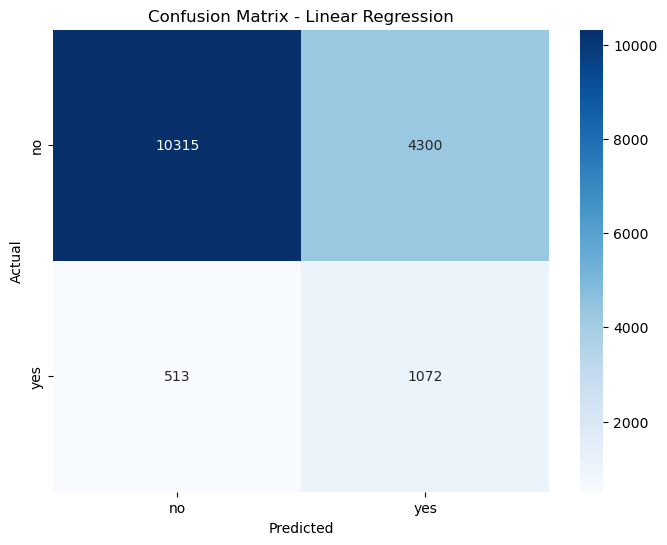

The model is not overfitting. Training and testing accuracies are similar.
Classification Report Explanation:

Class: No
  Precision: 0.95
  Recall: 0.71
  F1-score: 0.81
  Support: 14615

Explanation:
  - Precision: Out of all the predicted instances of class 'No', 95.26% were correct.
  - Recall: Out of all the actual instances of class 'No', 70.58% were correctly identified.
  - F1-score: The harmonic mean of precision and recall for class 'No'.
  - Support: The number of actual occurrences of class 'No' in the dataset.


Class: Yes
  Precision: 0.20
  Recall: 0.68
  F1-score: 0.31
  Support: 1585

Explanation:
  - Precision: Out of all the predicted instances of class 'Yes', 19.96% were correct.
  - Recall: Out of all the actual instances of class 'Yes', 67.63% were correctly identified.
  - F1-score: The harmonic mean of precision and recall for class 'Yes'.
  - Support: The number of actual occurrences of class 'Yes' in the dataset.




In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize the model
lr = LogisticRegression(random_state=42)

test_accuracy, y_pred_decoded, y_test_decoded, train_accuracy, train_report = train_and_evaluate_model(lr, X_train, y_train, X_test, y_test, le)

evaluate_and_plot_model('Linear Regression', y_test_decoded, y_pred_decoded, train_accuracy, test_accuracy)

explain_classification_report(y_test_decoded, y_pred_decoded)


In [41]:
train_report['1']

{'precision': 0.7109859475450874,
 'recall': 0.7346854791299235,
 'f1-score': 0.722641454881892,
 'support': 34020}

#### Random Forest Model

Random Forest:
              precision    recall  f1-score   support

          No       0.95      0.98      0.97     14615
         Yes       0.78      0.56      0.65      1585

    accuracy                           0.94     16200
   macro avg       0.87      0.77      0.81     16200
weighted avg       0.94      0.94      0.94     16200

Accuracy: 0.9418518518518518



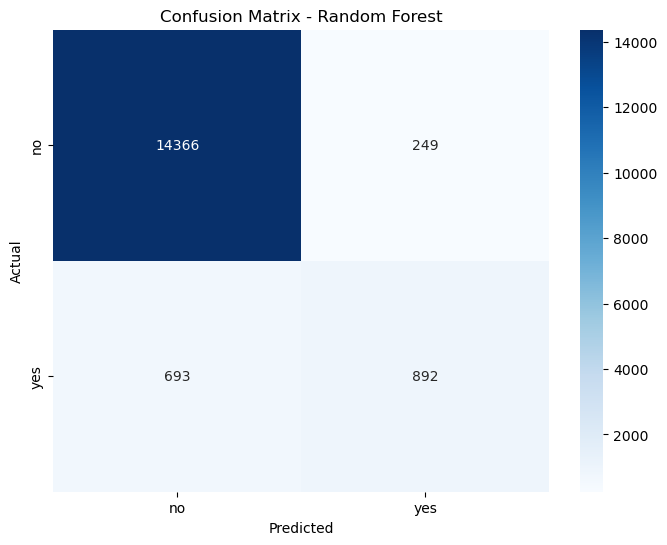

The model is not overfitting. Training and testing accuracies are similar.
Classification Report Explanation:

Class: No
  Precision: 0.95
  Recall: 0.98
  F1-score: 0.97
  Support: 14615

Explanation:
  - Precision: Out of all the predicted instances of class 'No', 95.40% were correct.
  - Recall: Out of all the actual instances of class 'No', 98.30% were correctly identified.
  - F1-score: The harmonic mean of precision and recall for class 'No'.
  - Support: The number of actual occurrences of class 'No' in the dataset.


Class: Yes
  Precision: 0.78
  Recall: 0.56
  F1-score: 0.65
  Support: 1585

Explanation:
  - Precision: Out of all the predicted instances of class 'Yes', 78.18% were correct.
  - Recall: Out of all the actual instances of class 'Yes', 56.28% were correctly identified.
  - F1-score: The harmonic mean of precision and recall for class 'Yes'.
  - Support: The number of actual occurrences of class 'Yes' in the dataset.




In [42]:
# Random Forest
rf = RandomForestClassifier(random_state=42)


test_accuracy, y_pred_decoded, y_test_decoded, train_accuracy, train_report = train_and_evaluate_model(rf, X_train, y_train, X_test, y_test, le)

evaluate_and_plot_model('Random Forest', y_test_decoded, y_pred_decoded, train_accuracy, test_accuracy)

explain_classification_report(y_test_decoded, y_pred_decoded)

#### Gradient Boosting for performance and better results.

Gradient Boosting:
              precision    recall  f1-score   support

          No       0.96      0.97      0.96     14615
         Yes       0.65      0.60      0.62      1585

    accuracy                           0.93     16200
   macro avg       0.80      0.78      0.79     16200
weighted avg       0.93      0.93      0.93     16200

Accuracy: 0.929074074074074



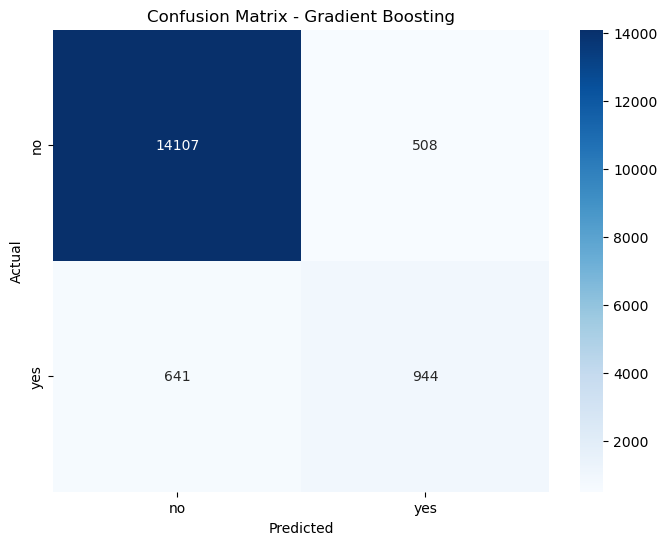

The model is not overfitting. Training and testing accuracies are similar.
Classification Report Explanation:

Class: No
  Precision: 0.96
  Recall: 0.97
  F1-score: 0.96
  Support: 14615

Explanation:
  - Precision: Out of all the predicted instances of class 'No', 95.65% were correct.
  - Recall: Out of all the actual instances of class 'No', 96.52% were correctly identified.
  - F1-score: The harmonic mean of precision and recall for class 'No'.
  - Support: The number of actual occurrences of class 'No' in the dataset.


Class: Yes
  Precision: 0.65
  Recall: 0.60
  F1-score: 0.62
  Support: 1585

Explanation:
  - Precision: Out of all the predicted instances of class 'Yes', 65.01% were correct.
  - Recall: Out of all the actual instances of class 'Yes', 59.56% were correctly identified.
  - F1-score: The harmonic mean of precision and recall for class 'Yes'.
  - Support: The number of actual occurrences of class 'Yes' in the dataset.




In [43]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

test_accuracy, y_pred_decoded, y_test_decoded, train_accuracy, train_report = train_and_evaluate_model(gb, X_train, y_train, X_test, y_test, le)

evaluate_and_plot_model('Gradient Boosting', y_test_decoded, y_pred_decoded, train_accuracy, test_accuracy)

explain_classification_report(y_test_decoded, y_pred_decoded)

In [44]:
# !pip install xgboost

In [45]:
train_report

{'0': {'precision': 0.9101023833966871,
  'recall': 0.9641681363903586,
  'f1-score': 0.9363554616691169,
  'support': 34020},
 '1': {'precision': 0.9619050595331105,
  'recall': 0.9047619047619048,
  'f1-score': 0.9324588376073555,
  'support': 34020},
 'accuracy': 0.9344650205761317,
 'macro avg': {'precision': 0.9360037214648989,
  'recall': 0.9344650205761317,
  'f1-score': 0.9344071496382362,
  'support': 68040},
 'weighted avg': {'precision': 0.9360037214648987,
  'recall': 0.9344650205761317,
  'f1-score': 0.9344071496382362,
  'support': 68040}}

#### XGBoost Regressor

XG Boost:
              precision    recall  f1-score   support

          No       0.96      0.99      0.97     14615
         Yes       0.83      0.61      0.70      1585

    accuracy                           0.95     16200
   macro avg       0.89      0.80      0.84     16200
weighted avg       0.95      0.95      0.95     16200

Accuracy: 0.9494444444444444



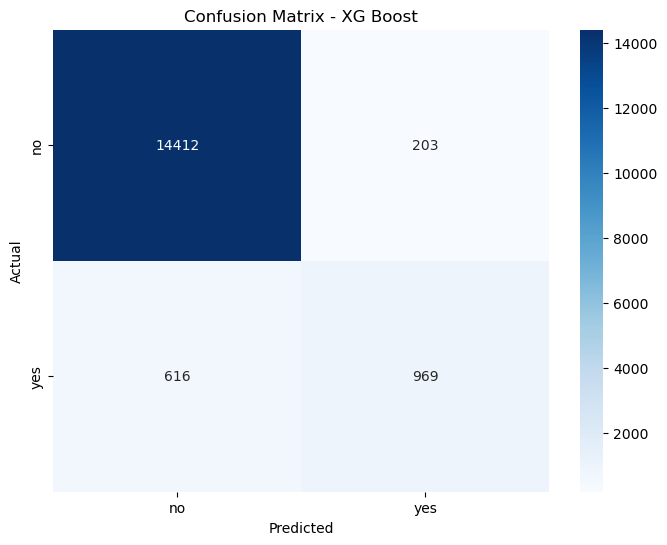

The model is not overfitting. Training and testing accuracies are similar.
Classification Report Explanation:

Class: No
  Precision: 0.96
  Recall: 0.99
  F1-score: 0.97
  Support: 14615

Explanation:
  - Precision: Out of all the predicted instances of class 'No', 95.90% were correct.
  - Recall: Out of all the actual instances of class 'No', 98.61% were correctly identified.
  - F1-score: The harmonic mean of precision and recall for class 'No'.
  - Support: The number of actual occurrences of class 'No' in the dataset.


Class: Yes
  Precision: 0.83
  Recall: 0.61
  F1-score: 0.70
  Support: 1585

Explanation:
  - Precision: Out of all the predicted instances of class 'Yes', 82.68% were correct.
  - Recall: Out of all the actual instances of class 'Yes', 61.14% were correctly identified.
  - F1-score: The harmonic mean of precision and recall for class 'Yes'.
  - Support: The number of actual occurrences of class 'Yes' in the dataset.




In [46]:
# XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

test_accuracy, y_pred_decoded, y_test_decoded, train_accuracy, train_report = train_and_evaluate_model(xgb, X_train, y_train, X_test, y_test, le)

evaluate_and_plot_model('XG Boost', y_test_decoded, y_pred_decoded, train_accuracy, test_accuracy)

explain_classification_report(y_test_decoded, y_pred_decoded)

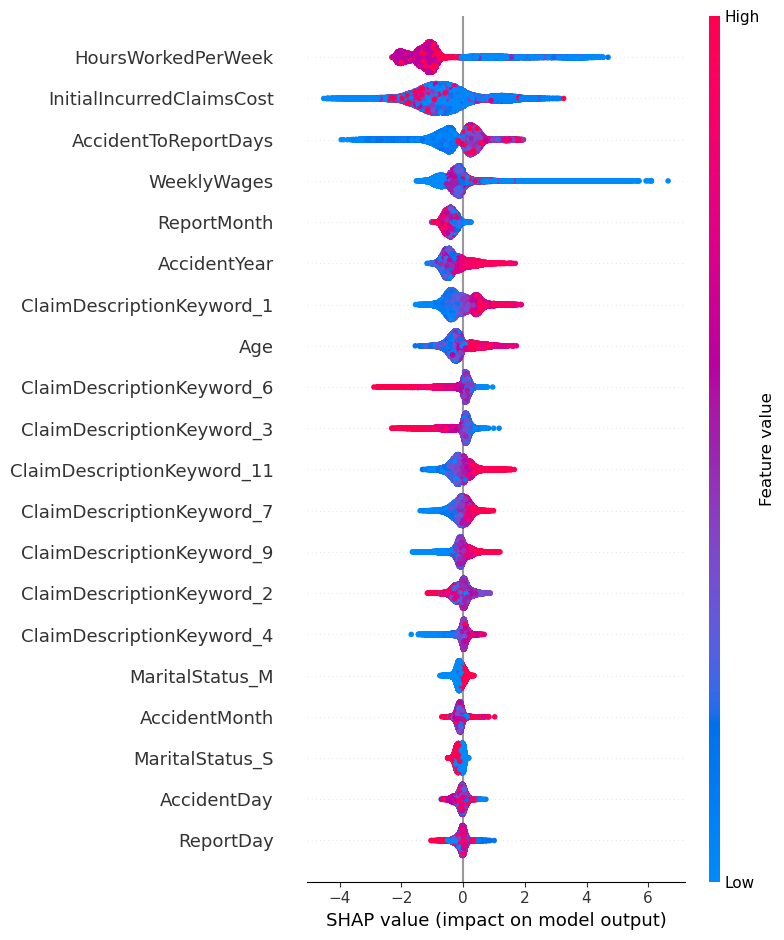

In [47]:
import shap
# Explain the model predictions using SHAP
explainer = shap.Explainer(xgb)
shap_values = explainer(X)

# Summary plot
shap.summary_plot(shap_values, X)

#### GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200,300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='recall', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

In [51]:
model = grid_search.best_estimator_
print(f"Best parameters for XGBoost: {grid_search.best_params_}")

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.6}


In [52]:
# Train the best model with the entire training data
xgb_model = grid_search.best_estimator_

In [53]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

XG Boost:
              precision    recall  f1-score   support

          No       0.96      0.99      0.97     14615
         Yes       0.84      0.62      0.71      1585

    accuracy                           0.95     16200
   macro avg       0.90      0.80      0.84     16200
weighted avg       0.95      0.95      0.95     16200

Accuracy: 0.951358024691358



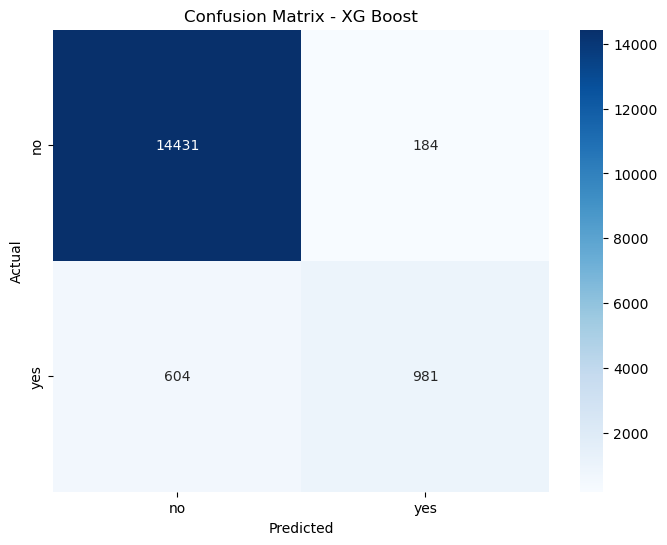

The model is not overfitting. Training and testing accuracies are similar.
Classification Report Explanation:

Class: No
  Precision: 0.96
  Recall: 0.99
  F1-score: 0.97
  Support: 14615

Explanation:
  - Precision: Out of all the predicted instances of class 'No', 95.98% were correct.
  - Recall: Out of all the actual instances of class 'No', 98.74% were correctly identified.
  - F1-score: The harmonic mean of precision and recall for class 'No'.
  - Support: The number of actual occurrences of class 'No' in the dataset.


Class: Yes
  Precision: 0.84
  Recall: 0.62
  F1-score: 0.71
  Support: 1585

Explanation:
  - Precision: Out of all the predicted instances of class 'Yes', 84.21% were correct.
  - Recall: Out of all the actual instances of class 'Yes', 61.89% were correctly identified.
  - F1-score: The harmonic mean of precision and recall for class 'Yes'.
  - Support: The number of actual occurrences of class 'Yes' in the dataset.


[CV] END colsample_bytree=1.0, learning_rate=

In [54]:
test_accuracy, y_pred_decoded, y_test_decoded, train_accuracy, train_report = train_and_evaluate_model(xgb_model, X_train, y_train, X_test, y_test, le)

evaluate_and_plot_model('XG Boost', y_test_decoded, y_pred_decoded, train_accuracy, test_accuracy)

explain_classification_report(y_test_decoded, y_pred_decoded)

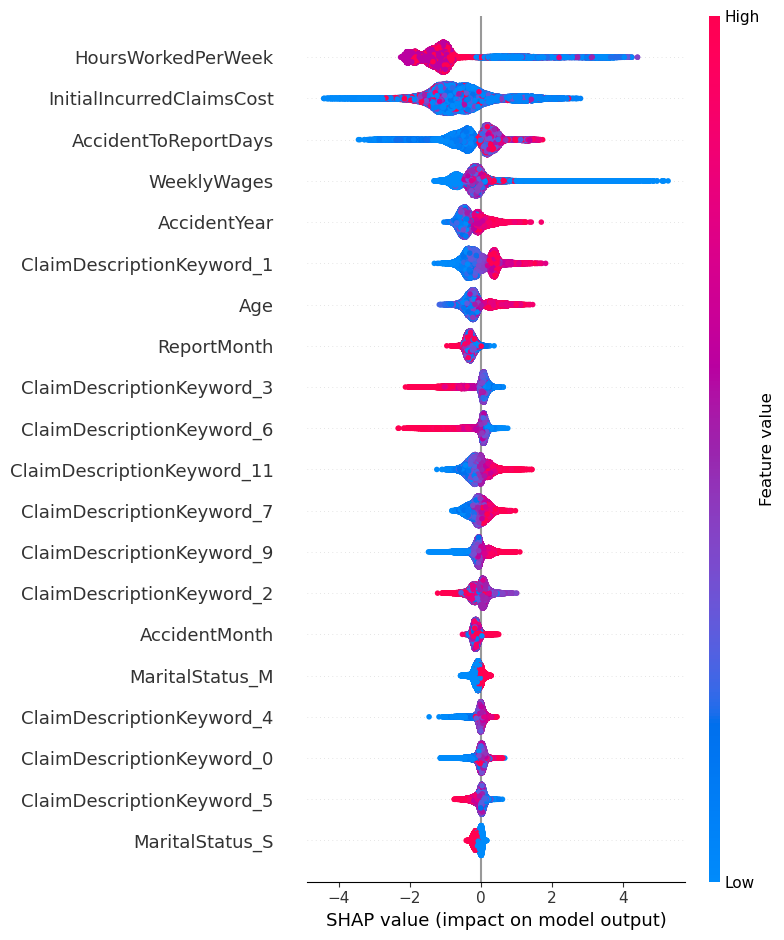

In [55]:

# Explain the model predictions using SHAP
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X)

# Summary plot
shap.summary_plot(shap_values, X)